# Read Matrix Data
Read in the gene expression data sets.

In [ ]:
## Download microarray matrix files from GEO

setwd("~/NLM_Reproducibility_Workshop/tb_and_arthritis/data")

In [ ]:
url <- c("ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE54nnn/GSE54992/matrix/GSE54992_series_matrix.txt.gz",
        "ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE19nnn/GSE19435/matrix/GSE19435_series_matrix.txt.gz",
        "ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE15nnn/GSE15573/matrix/GSE15573_series_matrix.txt.gz",
        "ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE19nnn/GSE19444/matrix/GSE19444_series_matrix.txt.gz",
        "ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE19nnn/GSE19435/matrix/GSE19435_series_matrix.txt.gz",
        "ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE65nnn/GSE65517/matrix/GSE65517_series_matrix.txt.gz")

In [ ]:
dest.file <- c("GSE54992_series_matrix.txt.gz","GSE19435_series_matrix.txt.gz","GSE15573_series_matrix.txt.gz",
              "GSE19444_series_matrix.txt.gz","GSE19435_series_matrix.txt.gz","GSE65517_series_matrix.txt.gz")

for (i in 1:length(url)){
utils::download.file(url[i], destfile=dest.file[i], mode="wb") 
}

In [ ]:
## Run perl script to reformat the matrix and filter out low quality samples
## output *_series_matrix_networkanalyst.txt
## input reformated matrices into NetworkAnalyst Website

In [ ]:
## Meanwhile, read all matrices into R scripts below to analyze them by applying similar strategies.

In [ ]:
## Download and install different types of microarray annotation database files
working.dir <- "~/NLM_Reproducibility_Workshop/tb_and_arthritis/working"
setwd(working.dir)

install.packages("BiocManager")
BiocManager::install("plyr")
BiocManager::install("annotate")
BiocManager::install("illuminaHumanv4.db")
BiocManager::install("hgu133plus2.db")
BiocManager::install("illuminaHumanv2.db")
BiocManager::install("illuminaHumanv3.db")

In [57]:
library(annotate)
library(illuminaHumanv3.db)
library(illuminaHumanv2.db)
library(hgu133plus2.db)
library(illuminaHumanv4.db)
library(plyr)

Loading required package: AnnotationDbi
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following object is masked from ‘package:limma’:

    plotMA

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, whic

In [62]:
setwd("/home/ubuntu/NLM_Reproducibility_Workshop/tb_and_arthritis/working/")
getwd()

[1] "/home/ubuntu/NLM_Reproducibility_Workshop/tb_and_arthritis/working"

In [63]:
## read in each type of microarray annotation database
## test one by one and make sure the annotation file match with the dataset
## could loop them into a list object

dat.v2 <- read.delim("GSE15573_series_matrix_networkanalyst.txt")
id.v2 <- select(illuminaHumanv2.db, as.character(dat.v2[2:nrow(dat.v2),1]),
                c("SYMBOL","ENTREZID", "GENENAME"))

dat.v3.1 <- read.delim("GSE19435_series_matrix_networkanalyst.txt")
id.v3.1 <- select(illuminaHumanv3.db, as.character(dat.v3.1[2:nrow(dat.v3.1),1]),
                c("SYMBOL","ENTREZID", "GENENAME"))

dat.v3.2 <- read.delim("GSE19444_series_matrix_networkanalyst.txt")
id.v3.2 <- select(illuminaHumanv3.db, as.character(dat.v3.2[2:nrow(dat.v3.2),1]),
                  c("SYMBOL","ENTREZID", "GENENAME"))

dat.v4 <- read.delim("GSE65517_series_matrix_networkanalyst.txt")
id.v4 <- select(illuminaHumanv4.db, as.character(dat.v4[2:nrow(dat.v4),1]),
                c("SYMBOL","ENTREZID", "GENENAME"))

dat.plus2 <- read.delim("GSE4588_series_matrix_networkanalyst.txt")
id.plus2 <- select(hgu133plus2.db, as.character(dat.plus2[2:nrow(dat.plus2),1]),
                c("SYMBOL","ENTREZID", "GENENAME"))

dat.plus2.2 <- read.delim("GSE54992_series_matrix_networkanalyst.txt")
id.plus2.2 <- select(hgu133plus2.db, as.character(dat.plus2.2[2:nrow(dat.plus2.2),1]),
                c("SYMBOL","ENTREZID", "GENENAME"))


colnames(dat.v2)[1]=colnames(id.v2)[1]
dat.v2.all <- join(dat.v2,id.v2,by="PROBEID")

colnames(dat.v3.1)[1]=colnames(id.v3.1)[1]
dat.v3.1.all <- join(dat.v3.1,id.v3.1,by="PROBEID")

colnames(dat.v3.2)[1]=colnames(id.v3.2)[1]
dat.v3.2.all <- join(dat.v3.2,id.v3.2,by="PROBEID")

colnames(dat.v4)[1]=colnames(id.v4)[1]
dat.v4.all <- join(dat.v4,id.v4,by="PROBEID")

colnames(dat.plus2)[1]=colnames(id.plus2)[1]
dat.plus2.all <- join(dat.plus2,id.plus2,by="PROBEID")

colnames(dat.plus2.2)[1]=colnames(id.plus2.2)[1]
dat.plus2.2.all <- join(dat.plus2.2,id.plus2.2,by="PROBEID")

'select()' returned 1:many mapping between keys and columns
'select()' returned 1:many mapping between keys and columns
'select()' returned 1:many mapping between keys and columns
'select()' returned 1:many mapping between keys and columns
'select()' returned 1:many mapping between keys and columns
'select()' returned 1:many mapping between keys and columns


# Sample Filtering
The paper used some inclusion criteria to select samples from each study. Samples without class labels are thus removed from further analyses.

In [64]:
datasets <- list(dat.v2.all,dat.v3.1.all,dat.v3.2.all,dat.v4.all,dat.plus2.all,dat.plus2.2.all)
for (i in 1:length(datasets)) {
    dataset <- datasets[[i]]
    dataset[1,(ncol(dataset)-2):ncol(dataset)] <- "Metadata"
    cat("Removing",sum(is.na(dataset[1,])),"samples.\n")
    datasets[[i]] <- dataset[,!is.na(dataset[1,])]  
}

Removing 0 samples.
Removing 14 samples.
Removing 20 samples.
Removing 7 samples.
Removing 15 samples.
Removing 24 samples.


# Convert into gene-based matrices
Remove rows without gene mapping. Merge rows mapping to the same gene using the median values.

In [65]:
dataset.class <- data.frame()
for (i in 1:length(datasets)) {
    dataset <- datasets[[i]]
    dataset.class <- rbind(dataset.class,t(dataset[1,-c(1,(ncol(dataset)-2):ncol(dataset)),drop=F]))
    dataset <- dataset[-1,]
    cat("Number of rows without gene symbols:",sum(is.na(dataset$SYMBOL)),"\n")
    dataset <- subset(dataset,!is.na(dataset$SYMBOL))
    dataset.expr <- apply(dataset[,-c(1,(ncol(dataset)-2):ncol(dataset))],2,as.numeric)
    #print(head(dataset.expr))
    dataset <- aggregate(dataset.expr,
                         list(dataset$SYMBOL),median)
    rownames(dataset) <- dataset$Group.1
    cat("From",nrow(datasets[[i]]),"rows to",nrow(dataset),"rows\n")
    datasets[[i]] <- dataset
}

Number of rows without gene symbols: 23334 
From 50281 rows to 19718 rows
Number of rows without gene symbols: 18174 
From 50954 rows to 19933 rows
Number of rows without gene symbols: 18174 
From 50954 rows to 19933 rows
Number of rows without gene symbols: 11606 
From 50605 rows to 21625 rows
Number of rows without gene symbols: 10334 
From 58364 rows to 22012 rows
Number of rows without gene symbols: 10334 
From 58364 rows to 22012 rows


# Merge datasets
Merge all studies into one, keeping only the genes that appear in all studies

In [66]:
common.genes <- unlist(sapply(datasets,rownames))
common.genes <- table(common.genes)
common.genes <- names(common.genes)[common.genes == length(datasets)]
cat("Number of common genes:",length(common.genes),"\n")
merged.dataset <- data.frame()
for (i in 1:length(datasets)) {
    dataset <- datasets[[i]]
    if (max(dataset[,-1]) > 100) {
        tmp <- dataset[,-1]
        tmp[tmp <  0] <- 0
        dataset[,-1] <- log2(tmp+0.001)
    }
    cat(min(dataset[,-1]),":",max(dataset[,-1]),"\n")
    merged.dataset <- rbind(merged.dataset,t(dataset[common.genes,]))
}
merged.dataset <- cbind(dataset.class,merged.dataset[rownames(dataset.class),])
colnames(merged.dataset)[1] <- "#CLASS"  
#write.table(t(merged.dataset),file = "../data/merged.dataset.txt",sep="\t",quote = F,row.names = T,col.names = T)

Number of common genes: 18205 
6.413344 : 15.88771 
-9.965784 : 15.52916 
-9.965784 : 15.75623 
-9.965784 : 14.63469 
-9.965784 : 15.19165 
0 : 16.5385 


In [67]:
head(datasets[[4]])
head(dataset.class)

,Group.1,GSM1599181,GSM1599182,GSM1599183,GSM1599187,GSM1599188,GSM1599189
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A1BG-AS1,A1BG-AS1,-13.812500,-3.020833,-3.770833,-4.0208335,-2.1875000,-2.937500
A1CF,A1CF,2.937500,4.062500,4.562500,-0.6041667,-0.7291667,7.354166
A2M,A2M,-2.187500,-0.062500,2.937500,2.9375000,-5.2708335,0.687500
A2ML1,A2ML1,2.145833,-6.145834,-3.812500,-2.1041667,-5.0625000,-3.020833
A4GALT,A4GALT,1.229167,-2.312500,-5.562500,-3.2708333,-8.8125000,-4.104166
A4GNT,A4GNT,8.020833,12.937500,4.562500,8.1041670,8.1458330,17.937500


,1
,<fct>
GSM389703,RA
GSM389704,RA
GSM389705,Healthy
GSM389706,RA
GSM389707,Healthy
GSM389708,RA


# Meta-Analysis
Used the MetaIntegrator package to run meta-analysis based on random-effect model. For each dataset, the expression values are quantile normalized and log2 transformed.

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


List of 5
 $ pheno        :'data.frame':	33 obs. of  1 variable:
 $ class        : Named num [1:33] 1 1 0 1 0 1 0 0 1 0 ...
  ..- attr(*, "names")= chr [1:33] "GSM389703" "GSM389704" "GSM389705" "GSM389706" ...
 $ keys         : Named chr [1:18205] "A1CF" "A2M" "A2ML1" "A4GALT" ...
  ..- attr(*, "names")= chr [1:18205] "A1CF" "A2M" "A2ML1" "A4GALT" ...
 $ formattedName: chr "Study.1"
 $ expr         : num [1:18205, 1:33] 7.35 7.25 7.71 7.44 7.63 ...
  ..- attr(*, "dimnames")=List of 2
List of 5
 $ pheno        :'data.frame':	19 obs. of  1 variable:
 $ class        : Named num [1:19] 0 0 0 0 0 0 0 0 0 0 ...
  ..- attr(*, "names")= chr [1:19] "GSM484368" "GSM484369" "GSM484370" "GSM484371" ...
 $ keys         : Named chr [1:18205] "A1CF" "A2M" "A2ML1" "A4GALT" ...
  ..- attr(*, "names")= chr [1:18205] "A1CF" "A2M" "A2ML1" "A4GALT" ...
 $ formattedName: chr "Study.2"
 $ expr         : num [1:18205, 1:19] 4.52 4.22 4.46 4.4 4.19 ...
  ..- attr(*, "dimnames")=List of 2
List of 5
 $ pheno   

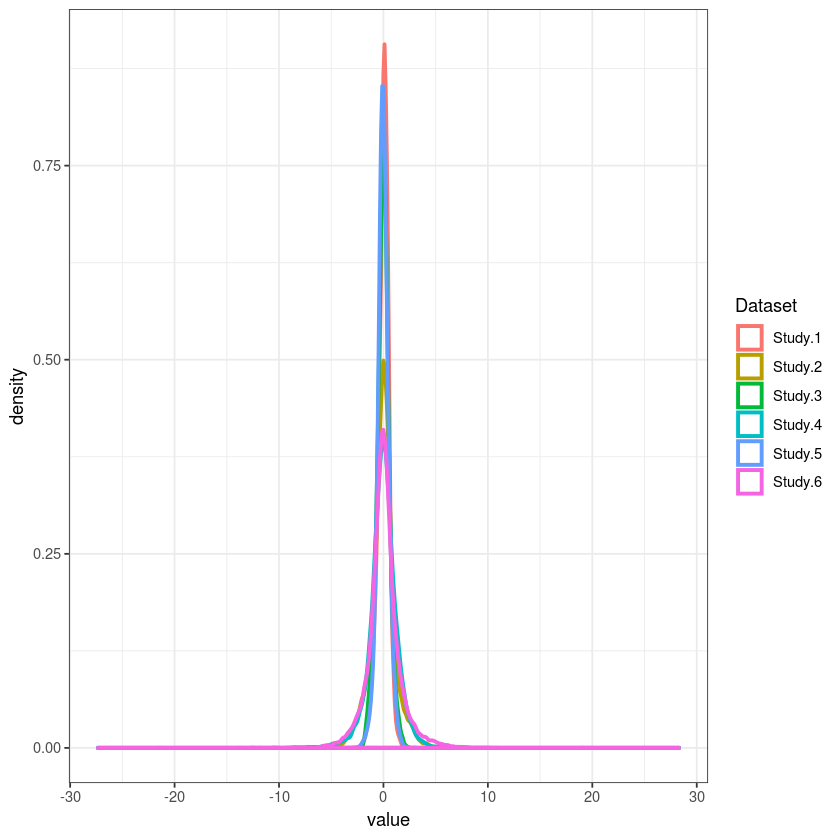

In [68]:
library("MetaIntegrator")
metaSet <- list()
# use the min expr across studies as offset for log2 transformation
min.expr <- min(unlist(lapply(datasets,function(x){min(x[common.genes,-1])})))
#print(min.expr)
for (i in 1:length(datasets)) {
    dataset <- datasets[[i]][common.genes,-1]
    # create data object
    dataObj <- list()
    dataObj$pheno <- data.frame(names=colnames(dataset),row.names = colnames(dataset))
    dataObj.class <- setNames(rep(0,ncol(dataset)),colnames(dataset))
    dataObj.class[as.character(dataset.class[colnames(dataset),1])!="Healthy"] <- 1
    dataObj$class <- dataObj.class
    dataObj$keys <- setNames(rownames(dataset),rownames(dataset))
    dataObj$formattedName <- paste0("Study.",i)
    expr <- as.matrix(dataset)
    # quantile normalization
    expr <- preprocessCore::normalize.quantiles(expr)
    rownames(expr) <- rownames(dataset)
    colnames(expr) <- colnames(dataset)
    # log2 transformation
    #print(min(expr))
    dataObj$expr <- log2(expr+abs(min.expr))
    #print(dim(dataObj$expr))
    if (checkDataObject(dataObj,"Dataset")) {
      metaSet[[i]] <- dataObj
      names(metaSet)[i] <- dataObj$formattedName
      str(metaSet[[i]], max.level = 1)  
    }
}
metaObj <- list(originalData = metaSet)
# run meta-analysis
metaObj <- runMetaAnalysis(metaObj,maxCores = 1)



In [71]:
res <- metaObj$metaAnalysis$pooledResults
res <- res[order(abs(res$effectSizeFDR),decreasing = F),]
cat("Number of genes with effect size FDR < 1%:",sum(res$effectSizeFDR < 0.01),"\n")
head(res,10)

Number of genes with effect size FDR < 1%: 312 


,effectSize,effectSizeStandardError,effectSizePval,effectSizeFDR,tauSquared,numStudies,cochranesQ,heterogeneityPval,fisherStatUp,fisherPvalUp,fisherFDRUp,fisherStatDown,fisherPvalDown,fisherFDRDown
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
DDX24,-1.502206,0.2002638,6.326662e-14,1.151769e-09,0.0000000,6,3.576361,0.6118660,0.10925272,1.000000e+00,1.000000e+00,91.18825927,2.905905e-14,1.758618e-11
TLR5,1.437996,0.1976258,3.429542e-13,3.121740e-09,0.0000000,6,1.356191,0.9290449,85.48952451,3.664434e-13,6.753247e-11,0.07650714,1.000000e+00,1.000000e+00
MEPCE,-1.382137,0.1965761,2.049844e-12,1.243914e-08,0.0000000,6,4.079675,0.5380027,0.18974865,1.000000e+00,1.000000e+00,84.22729978,6.406350e-13,1.690255e-10
MEF2D,-1.321840,0.1947555,1.143479e-11,5.204259e-08,0.0000000,6,3.410428,0.6369822,0.07601953,1.000000e+00,1.000000e+00,79.68445225,4.740634e-12,8.298389e-10
CCR2,1.281868,0.1929276,3.046687e-11,1.109299e-07,0.0000000,6,4.086011,0.5371002,76.22575986,2.153707e-11,2.154299e-09,0.43828362,9.999999e-01,1.000000e+00
TNFSF10,1.934504,0.2957805,6.137999e-11,1.862371e-07,0.1904127,6,8.170639,0.1470788,120.68742635,4.507325e-20,1.367598e-16,0.04079610,1.000000e+00,1.000000e+00
CDKN2AIP,-1.210190,0.1904912,2.111560e-10,5.491564e-07,0.0000000,6,3.855119,0.5704583,1.11939525,9.999735e-01,1.000000e+00,70.41657789,2.676618e-10,2.331475e-08
NOP53,-1.194680,0.1907075,3.741071e-10,8.513275e-07,0.0000000,6,4.617482,0.4643203,0.43695664,9.999999e-01,1.000000e+00,71.57288095,1.624746e-10,1.509107e-08
KIAA0319L,1.178909,0.1899144,5.380722e-10,1.088401e-06,0.0000000,6,2.459626,0.7825628,67.97199366,7.657857e-10,4.678231e-08,0.21565870,1.000000e+00,1.000000e+00


In [76]:
dim(res)
rownames(res)[1:10]
class(rownames(res))
length(rownames(res))

[1] 18205    14

[1] "DDX24"     "TLR5"      "MEPCE"     "MEF2D"     "CCR2"      "TNFSF10"  
 [7] "CDKN2AIP"  "NOP53"     "KIAA0319L" "TENT4A"

[1] "character"

[1] 18205

In [87]:
## compare with top341 published gene list

#summary(rownames(res)[1:312]%in%as.character(sig341[,1]))
as.character(sig341[,1])[1:10]
summary(rownames(res)[1:312]%in%as.character(sig341[,1]))

[1] "DDX24"    "PPP1R16B" "ALG13"    "HNRNPH1"  "USP36"    "CDKN2AIP"
 [7] "MEPCE"    "SIAH1"    "PAPD7"    "CCDC84"

   Mode   FALSE    TRUE 
logical     121     191 

In [90]:
overlap <- intersect(rownames(res)[1:312],as.character(sig341[,1]))
#overlap.n <- vennCounts(overlap)
overlap


[1] "DDX24"     "TLR5"      "MEPCE"     "MEF2D"     "TNFSF10"   "CDKN2AIP" 
  [7] "KIAA0319L" "HP"        "ALG9"      "IL17RA"    "CPEB3"     "PSMA4"    
 [13] "SPTLC2"    "DYSF"      "HNRNPH1"   "GLRX"      "TNFSF13B"  "PPP1R16B" 
 [19] "SAP30"     "KANSL3"    "SCCPDH"    "DNAJC27"   "CASP5"     "BATF"     
 [25] "ERLIN1"    "TRABD"     "SNRNP200"  "ZNF548"    "IFIT5"     "SLC41A3"  
 [31] "LCN2"      "COQ10A"    "HLX"       "PRNP"      "HIC2"      "ARIH2"    
 [37] "RSAD2"     "FUT7"      "RNMT"      "LY96"      "CRY2"      "ABLIM3"   
 [43] "PHF10"     "FAM168B"   "ASGR2"     "TLR8"      "POLR1C"    "MPHOSPH10"
 [49] "RNF31"     "PRMT5"     "AURKB"     "PLEKHF1"   "NDUFAF3"   "CASP1"    
 [55] "TSHZ3"     "DHRS7B"    "SURF6"     "RHOT1"     "OAS3"      "TMEM8A"   
 [61] "SUPV3L1"   "KCTD12"    "MEGF9"     "GNL1"      "ITGA2B"    "RPS19"    
 [67] "LMO2"      "RYK"       "IGSF6"     "RNF216"    "VCAN"      "CCDC84"   
 [73] "OSTM1"     "CDK5RAP1"  "ITFG2"     "CARD16"    "MARCKSL1"  "DHX9"     
 [79] "STAB1"     "PVRIG"     "PAK1"      "AP5B1"     "NUDT16"    "FN3KRP"   
 [85] "LPAR6"     "ID3"       "CRISPLD2"  "PLBD1"     "F5"        "RENBP"    
 [91] "FAM43A"    "CAMK2N1"   "S1PR1"     "WRN"       "YIPF1"     "ANKRA2"   
 [97] "RAB32"     "ATG7"      "DMTF1"     "KIF15"     "CMPK2"     "COX15"    
[103] "PARP15"    "DBI"       "ZBED4"     "S1PR3"     "HNRNPA0"   "TMBIM4"   
[109] "ILKAP"     "DNAJC18"   "S100A12"   "PROS1"     "ANKRD22"   "OPLAH"    
[115] "IGF2BP3"   "SIGLEC5"   "METTL17"   "PRPS1"     "LONP1"     "CYTH1"    
[121] "TREML1"    "DDX27"     "SLC22A16"  "IFIT1"     "B3GNT8"    "MPO"      
[127] "FOLR3"     "DDX58"     "MXD3"      "ZNF212"    "MFSD1"     "GSK3B"    
[133] "PIGF"      "MCTS1"     "FBXW4"     "FAM111A"   "TNFAIP8L2" "VWA5A"    
[139] "GABPA"     "AFG3L2"    "GPR183"    "WDR74"     "GIMAP2"    "LRP5L"    
[145] "PIK3IP1"   "CCR7"      "POLR2D"    "STOM"      "C2orf88"   "MSRB1"    
[151] "SHISA2"    "BSDC1"     "IQGAP1"    "TUBGCP5"   "JOSD1"     "CLEC4D"   
[157] "SLC25A11"  "APOBR"     "HK3"       "TK2"       "ATXN7L2"   "C1QB"     
[163] "NUDT22"    "LY9"       "LRP1"      "IFI27"     "TRAFD1"    "THOC1"    
[169] "HAL"       "MAP3K4"    "IFI44L"    "BLVRA"     "E4F1"      "KIAA0040" 
[175] "FOSB"      "IGFL2"     "NUP107"    "RABGGTB"   "MCOLN2"    "FLYWCH1"  
[181] "NEXN"      "PARP10"    "COMMD10"   "MX2"       "ANKRD35"   "ACOT13"   
[187] "POLE3"     "IFI44"     "PASK"      "PTBP2"     "RUNX3"

In [100]:
library(gplots)

In [96]:
input <- list()

ERROR: Error in `[.data.frame`(res, 1:312): undefined columns selected


In [99]:
?venn

# Differential Expression Genes Detection
Used sva, limma package to do Combat normalization to remove the batch factor and detected the differential expressed genes between disease and healthy groups based on regression model.

In [ ]:
### to do combat normalization

In [1]:
library(sva)
library(devtools)

Loading required package: mgcv
Loading required package: nlme
This is mgcv 1.8-28. For overview type 'help("mgcv-package")'.
Loading required package: genefilter
Loading required package: BiocParallel


In [55]:
#head(t(merged.dataset) # should save merged.dataset

In [ ]:
## continue working on merged datasets and following the similiar strategy

In [6]:
setwd("~/NLM_Reproducibility_Workshop/data")

In [7]:
merged.dataset <- read.delim("merged.dataset.txt")
head(merged.dataset)

,GSM389703,GSM389704,GSM389705,GSM389706,GSM389707,GSM389708,GSM389709,GSM389710,GSM389711,GSM389712,⋯,GSM1327531,GSM1327533,GSM1327535,GSM1327540,GSM1327541,GSM1327542,GSM1327544,GSM1327546,GSM1327549,GSM1327550
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
#CLASS,RA,RA,Healthy,RA,Healthy,RA,Healthy,Healthy,RA,Healthy,⋯,TB,TB,TB,TB,Healthy,Healthy,Healthy,Healthy,Healthy,Healthy
A1CF,7.141797,7.197045,7.122337,7.204903,7.189596,7.130171,7.042596,7.231972,7.227221,7.287982,⋯,4.02235335,4.51622020,2.85592080,4.49177415,4.406767750,5.57438430,5.318372000,5.03258470,5.20997165,5.22182185
A2M,7.029003,7.101189,7.096027,7.008570,6.996296,7.226256,7.125058,7.194374,7.143266,7.285384,⋯,6.02278985,4.07172385,4.90828205,6.31538965,6.036567950,5.87433620,5.158579000,6.26011845,5.47088145,6.20920705
A2ML1,7.575453,7.597774,7.717223,7.927268,7.408724,7.583378,7.642665,7.595066,7.627102,7.489733,⋯,5.71163700,4.86576620,3.53536070,4.53559050,3.854281250,3.64424540,3.364639650,4.76493950,3.78714480,2.92730750
A4GALT,7.246332,7.091080,7.216745,7.240897,7.107234,7.248818,7.088888,7.188603,7.143010,7.308314,⋯,6.25344470,4.41422700,4.06841950,5.36375500,5.151473500,5.66670130,2.955237200,6.26900500,3.58906750,2.78438200
A4GNT,7.480316,7.478925,7.369129,7.530114,7.534178,7.390891,7.447209,7.323019,7.483748,7.329446,⋯,5.42316100,6.60445500,4.83532240,6.46519800,6.735679600,4.68708040,4.022444700,6.59867600,6.96301360,6.53558700


In [20]:
merged.dataset2 <- merged.dataset[-1,]
grps <- as.character(as.matrix(merged.dataset[1,]))

merged.dataset.num <- round(apply(merged.dataset[-1,],2,as.numeric),2)
dim(merged.dataset.num)

grp <- c("Healthy","TB","RA")
#grp.all <- c(which(merged.dataset[1,]==grp[1]),which(merged.dataset[1,]==grp[2]),which(merged.dataset[1,]==grp[3]))
#length(grp.all)
#merged.dataset.num.rord <- merged.dataset.num[,grp.all]
#rownames(merged.dataset.num.rord)=rownames(merged.dataset)[-1]
#colnames(merged.dataset.num.rord)
cl <- rep(c("green","red","blue","purple","orange","yellow"),c(10,30,30,30,30,11))  ## find the numbers of the samples in each study

[1] 18205   141

In [13]:
# combat normalize crossing all batches samples
#merged.dataset.norm <- normalizeVSN(merged.dataset.num.rord)

design <- model.matrix(~ grps)
batches <- rep(c(1:6),c(10,30,30,30,30,11))

In [14]:
merged.dataset.norm <- ComBat(merged.dataset.num, batches, mod=design, par.prior=TRUE, prior.plots=FALSE)
rownames(merged.dataset.norm)=rownames(merged.dataset)[-1]

Found6batches
Adjusting for2covariate(s) or covariate level(s)


Standardizing Data across genes


Fitting L/S model and finding priors
Finding parametric adjustments
Adjusting the Data



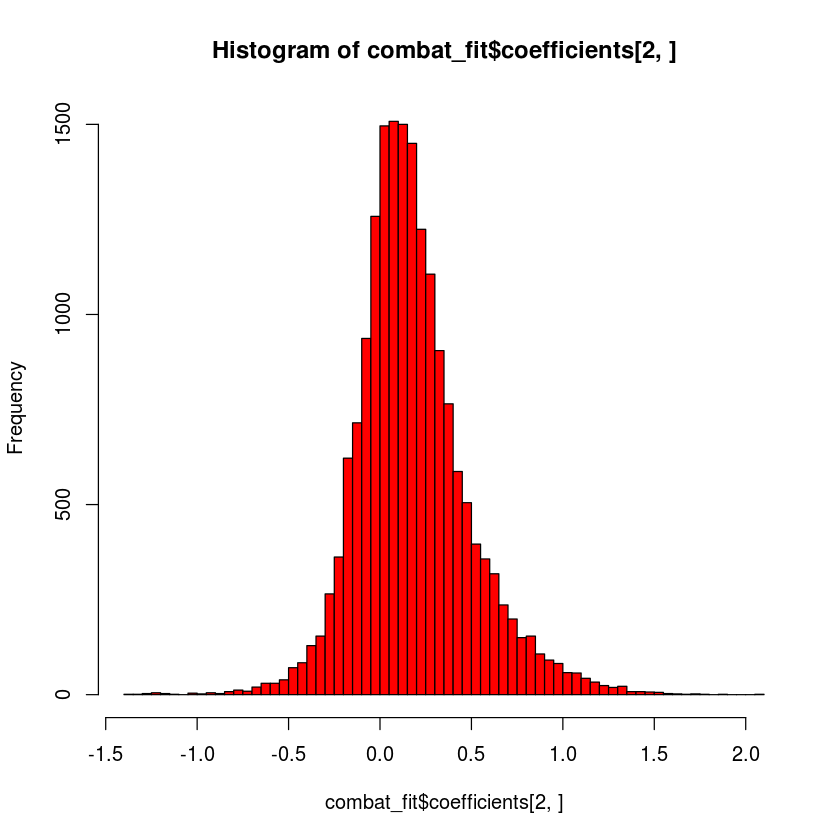

In [15]:
combat_fit = lm.fit(design,t(merged.dataset.norm))
par(mfrow=c(1,1))
hist(combat_fit$coefficients[2,],col=2,breaks=100)

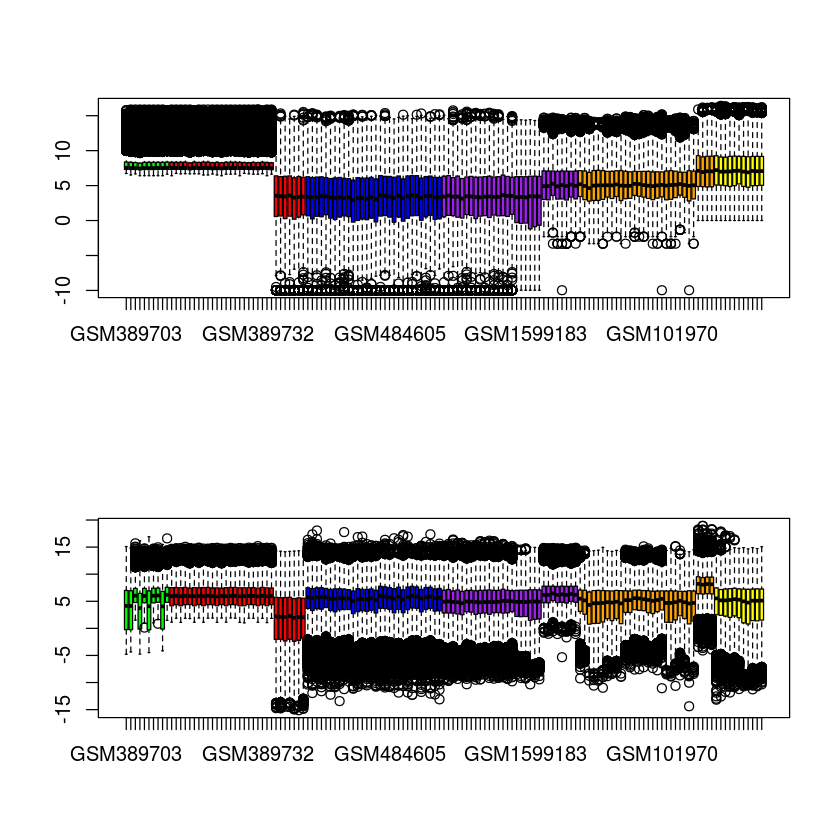

In [21]:
par(mfrow=c(2,1))
boxplot(merged.dataset.num, col=cl)
boxplot(merged.dataset.norm, col=cl)

In [22]:
## PCA analysis
merged.dataset.num.pca <- prcomp(t(merged.dataset.num))
merged.dataset.norm.pca <- prcomp(t(merged.dataset.norm))
merged.dataset.num.pca.proportionvariances <- ((merged.dataset.num.pca$sdev^2) / (sum(merged.dataset.num.pca$sdev^2)))*100
merged.dataset.norm.pca.proportionvariances <- ((merged.dataset.norm.pca$sdev^2) / (sum(merged.dataset.norm.pca$sdev^2)))*100

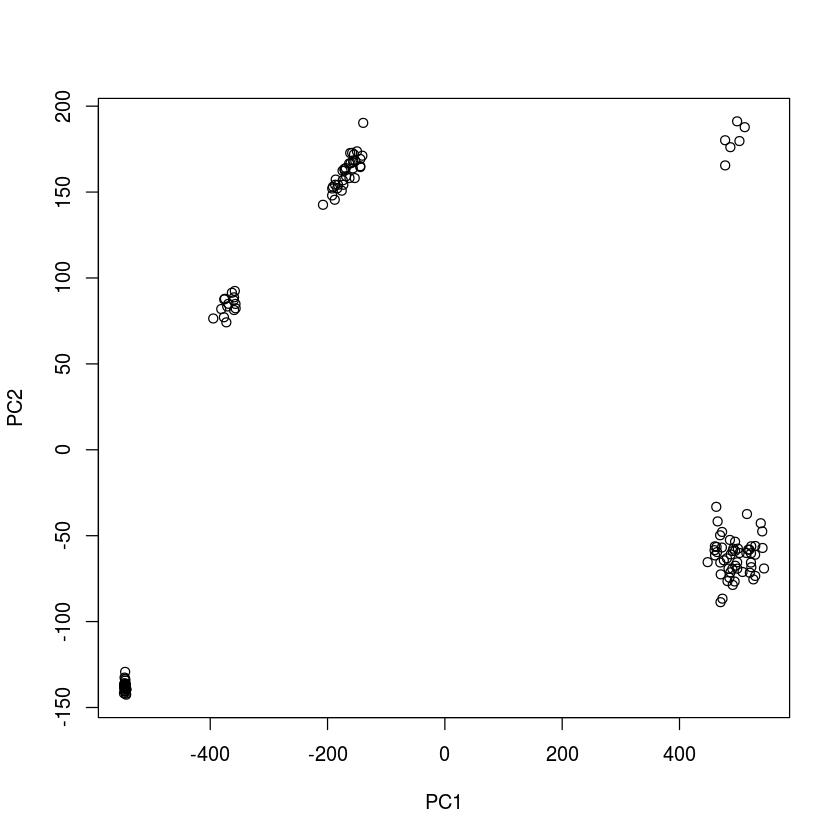

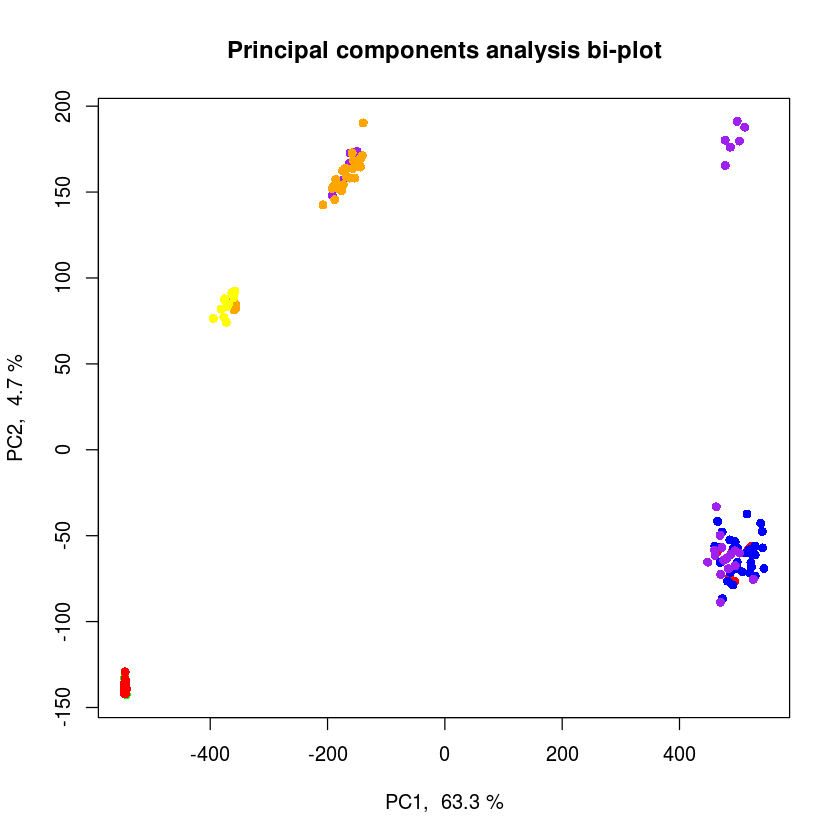

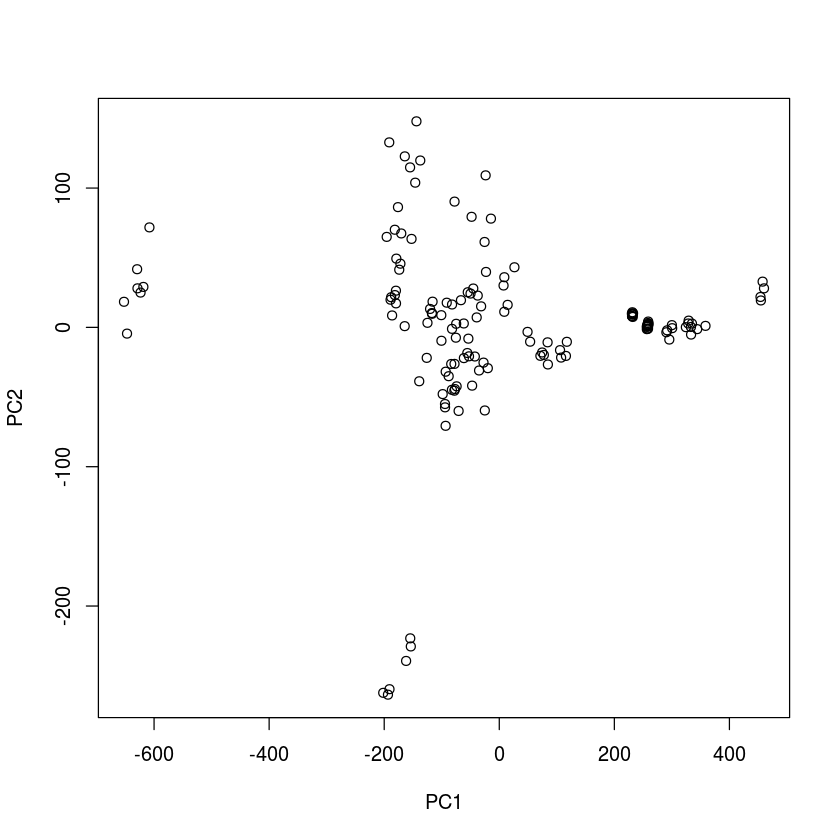

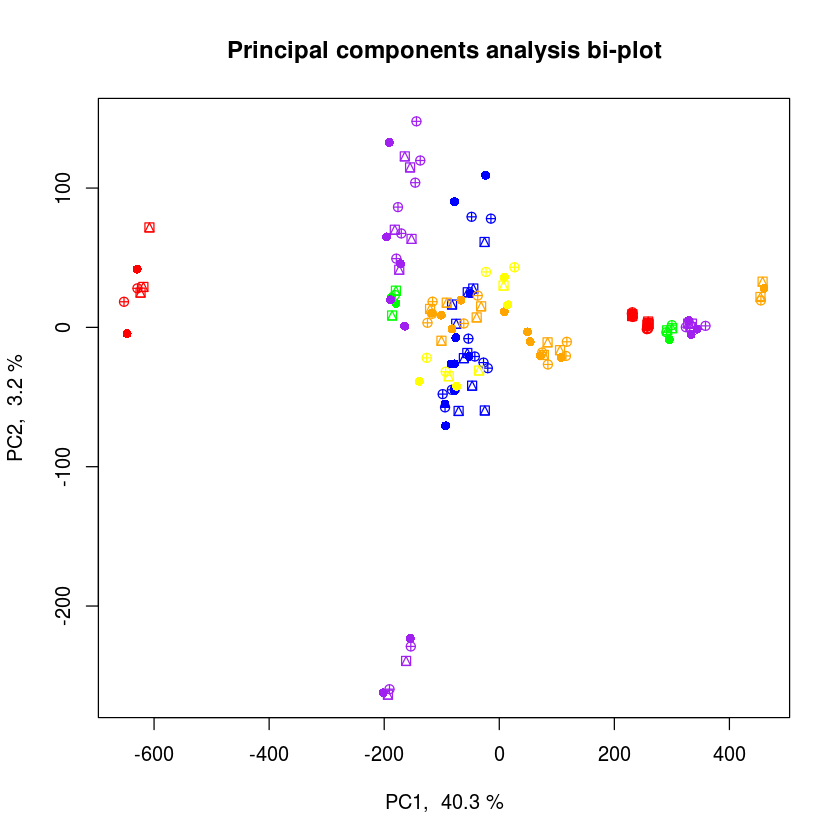

In [23]:
### Make PCA plots

plot(merged.dataset.num.pca$x)

plot(merged.dataset.num.pca$x, type="n", main="Principal components analysis bi-plot", 
     xlab=paste("PC1, ", round(merged.dataset.num.pca.proportionvariances[1], 1), "%"),
     ylab=paste("PC2, ", round(merged.dataset.num.pca.proportionvariances[2], 1), "%"))
points(merged.dataset.num.pca$x, col=cl, pch=16, cex=1)

plot(merged.dataset.norm.pca$x)
plot(merged.dataset.norm.pca$x, type="n", main="Principal components analysis bi-plot", 
     xlab=paste("PC1, ", round(merged.dataset.norm.pca.proportionvariances[1], 1), "%"),
     ylab=paste("PC2, ", round(merged.dataset.norm.pca.proportionvariances[2], 1), "%"))
points(merged.dataset.norm.pca$x, col=cl, pch=c(14,10,16), cex=1)

In [33]:
head(merged.dataset.norm)
dim(merged.dataset.norm)

,GSM389703,GSM389704,GSM389705,GSM389706,GSM389707,GSM389708,GSM389709,GSM389710,GSM389711,GSM389712,⋯,GSM1327531,GSM1327533,GSM1327535,GSM1327540,GSM1327541,GSM1327542,GSM1327544,GSM1327546,GSM1327549,GSM1327550
A1CF,-1.4696041,-1.2182413,4.794944,-1.2182413,5.088201,-1.5114979,4.459794,5.255776,-1.0925598,5.507139,⋯,-0.2337752,1.451820,-4.144355,1.350684,-2.98403094,0.9265487,0.0837514,-0.8938935,-0.2870794,-0.2533675
A2M,-2.3948572,-2.1461068,4.218420,-2.4659287,3.863063,-1.6841419,4.325028,4.538242,-2.0039638,4.893600,⋯,2.6541166,-4.092276,-1.186138,3.692023,-0.92199171,-1.5101388,-3.9665176,-0.1608602,-2.8940142,-0.3338447
A2ML1,-2.7084309,-2.6347089,4.482424,-1.4182964,3.339733,-2.7084309,4.187536,4.040092,-2.5241260,3.634621,⋯,5.3505492,2.554737,-1.871966,1.456382,-1.76161894,-2.4605720,-3.3925094,1.2671776,-1.9613198,-4.8236990
A4GALT,-0.7076038,-1.3752625,5.606578,-0.7493325,5.147563,-0.7076038,5.064105,5.481392,-1.1666192,5.982136,⋯,5.8428890,1.570309,0.780810,3.776260,-0.05340981,1.1540586,-5.1387094,2.5472913,-3.6758150,-5.5566792
A4GNT,-0.7839083,-0.7839083,5.321666,-0.5720018,5.999767,-1.1653402,5.660716,5.109759,-0.7839083,5.152141,⋯,-0.4716101,3.330724,-2.340554,2.911823,4.71026884,-1.8954813,-4.0544338,4.2591444,5.4191786,4.0658054
AAAS,5.0009293,5.5035365,6.558826,4.1527798,5.930567,4.8124516,6.338936,6.621652,4.2156057,6.401762,⋯,3.9546125,3.531174,5.940069,6.833995,5.78320726,5.6232416,2.7062203,5.6985196,6.6677234,4.5693500


[1] 18205   141

In [34]:
library(limma)
design.limma <- model.matrix(~ 0+grps)
design.limma
fit <- lmFit(merged.dataset.norm, design.limma)

contrast.matrix=makeContrasts(grpsRA-grpsHealthy,grpsTB-grpsHealthy,
                              (grpsRA+grpsTB)-grpsHealthy,levels=design.limma)
colnames(contrast.matrix)=c("RA_ctrl","TB_ctrl","RATB_ctrl")
fit.contrast=contrasts.fit(fit,contrast.matrix)
efit.contrast=eBayes(fit.contrast)

grpsHealthy,grpsRA,grpsTB
0,1,0
0,1,0
1,0,0
0,1,0
1,0,0
0,1,0
1,0,0
1,0,0
0,1,0
1,0,0


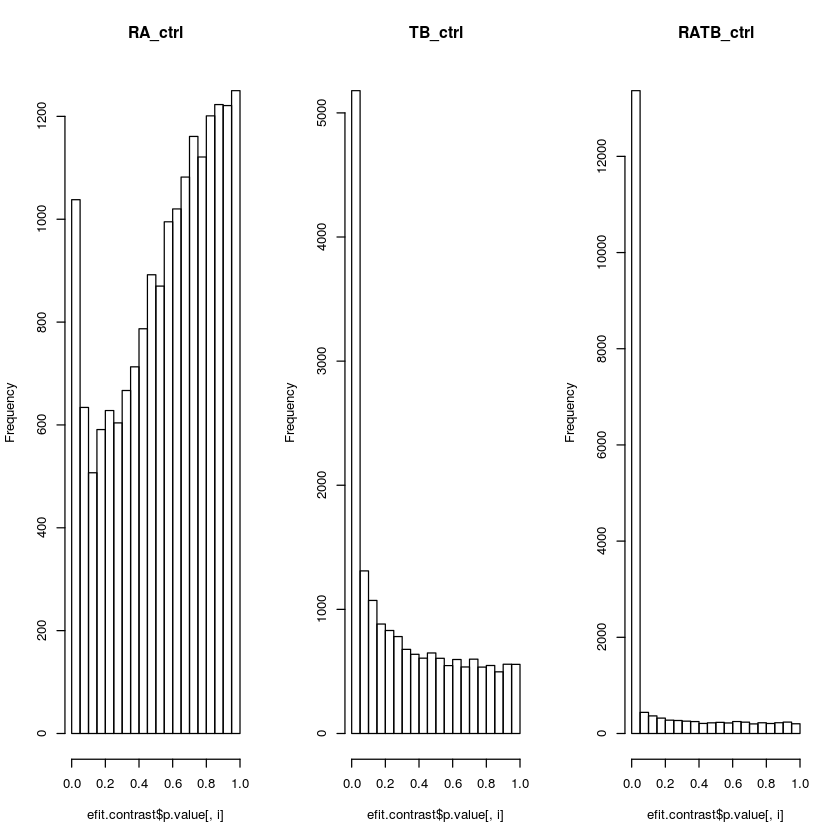

In [28]:
par(mfrow=c(1,3))
for (i in 1:ncol(efit.contrast$p.value)){
  hist(efit.contrast$p.value[,i],main=colnames(efit.contrast$p.value)[i])
}

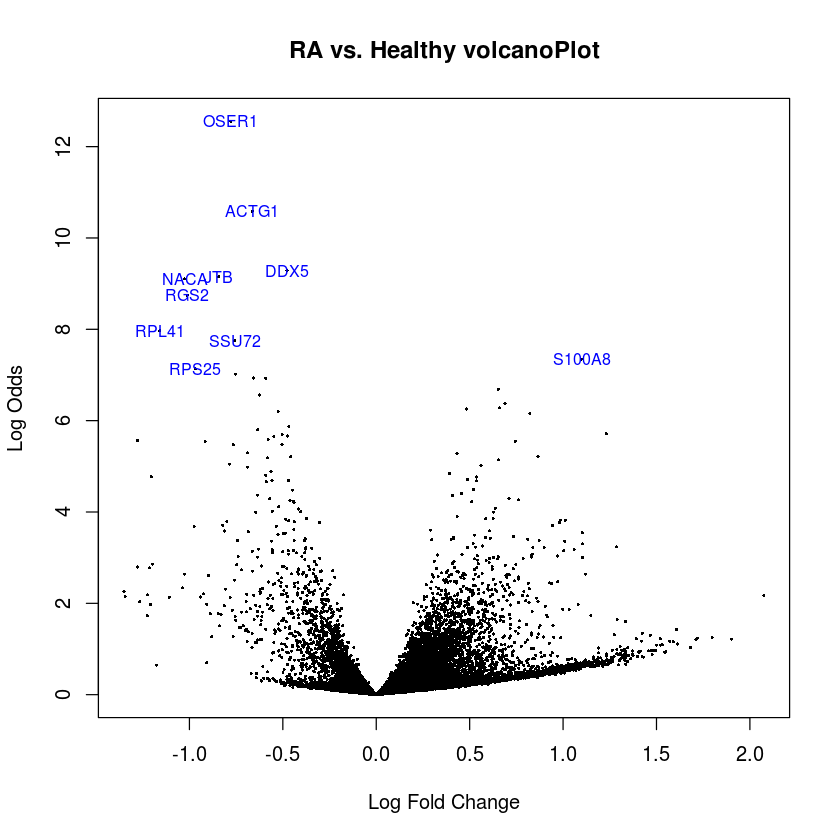

In [36]:
volcanoplot(efit.contrast, coef=1, highlight=10,names=rownames(efit.contrast), 
            xlab="Log Fold Change", ylab="Log Odds", pch=16,main="RA vs. Healthy volcanoPlot")

In [39]:
topTable(efit.contrast,coef=1,adjust.method="BH",n=50,p.value=0.01)
topTable(efit.contrast,coef=2,adjust.method="BH",n=50,p.value=0.01)
topTable(efit.contrast,coef=3,adjust.method="BH",n=50,p.value=0.01)

,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
OSER1,-0.7780069,8.777577,-8.077801,2.790977e-13,5.080973e-09,18.901953
ACTG1,-0.6641670,13.031373,-7.249742,2.607137e-11,2.373146e-07,14.808006
DDX5,-0.4777060,11.941926,-6.680674,5.226896e-10,2.857161e-06,12.098859
JTB,-0.8423095,11.086188,-6.621969,7.075618e-10,2.857161e-06,11.825160
NACA,-1.0260964,12.132003,-6.601848,7.847188e-10,2.857161e-06,11.731618
RGS2,-1.0112692,12.375103,-6.440530,1.789256e-09,5.428900e-06,10.986721
RPL41,-1.1588115,12.430895,-6.081786,1.077662e-08,2.802690e-05,9.364405
SSU72,-0.7575038,8.444238,-5.981890,1.759616e-08,4.004226e-05,8.921607
S100A8,1.0999536,13.395783,5.789115,4.475664e-08,9.053273e-05,8.078850


,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
FCGR1A,2.9384861,7.198332,14.984505,7.417049e-31,1.350274e-26,59.18631
GBP5,2.6195350,9.213664,14.079902,1.420167e-28,1.292707e-24,54.08510
EPSTI1,2.3715647,9.493298,13.646011,1.806914e-27,1.018597e-23,51.61285
VAMP5,2.2037542,8.576404,13.609607,2.238059e-27,1.018597e-23,51.40476
ANKRD22,3.5121191,6.504420,13.457954,5.462855e-27,1.989025e-23,50.53687
SAMD9L,1.7571388,8.336727,12.990805,8.607609e-26,2.611692e-22,47.85391
SCO2,2.1904099,9.088303,12.875281,1.705156e-25,4.434623e-22,47.18843
STAT1,1.9114655,9.965583,12.482423,1.750554e-24,3.983605e-21,44.92051
JAK2,1.5551567,7.220056,12.175851,1.081367e-23,2.187364e-20,43.14648


,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
UBC,14.071959,14.054202,155.41299,2.853447e-158,5.194700e-154,304.5792
DDX5,11.573416,11.941926,130.45598,9.868430e-148,8.982738e-144,291.7497
RPL11,13.606924,13.684791,123.19725,2.722222e-144,1.651935e-140,287.1067
RPS11,12.991655,13.119042,122.79365,4.285787e-144,1.950569e-140,286.8340
COX4I1,12.276020,12.136572,121.78138,1.346527e-143,4.902704e-140,286.1432
RACK1,13.490022,13.546962,119.63615,1.571805e-142,4.769118e-139,284.6450
RPS16,13.812038,14.042158,118.88305,3.762736e-142,9.785800e-139,284.1078
MYL6,13.413541,12.807981,118.50373,5.852455e-142,1.331799e-138,283.8349
CYTH1,9.949919,10.071378,113.31196,2.852864e-139,5.770710e-136,279.9423


       RA_ctrl TB_ctrl RATB_ctrl
Down        35     207         0
NotSig   18154   15824      5688
Up          16    2174     12517

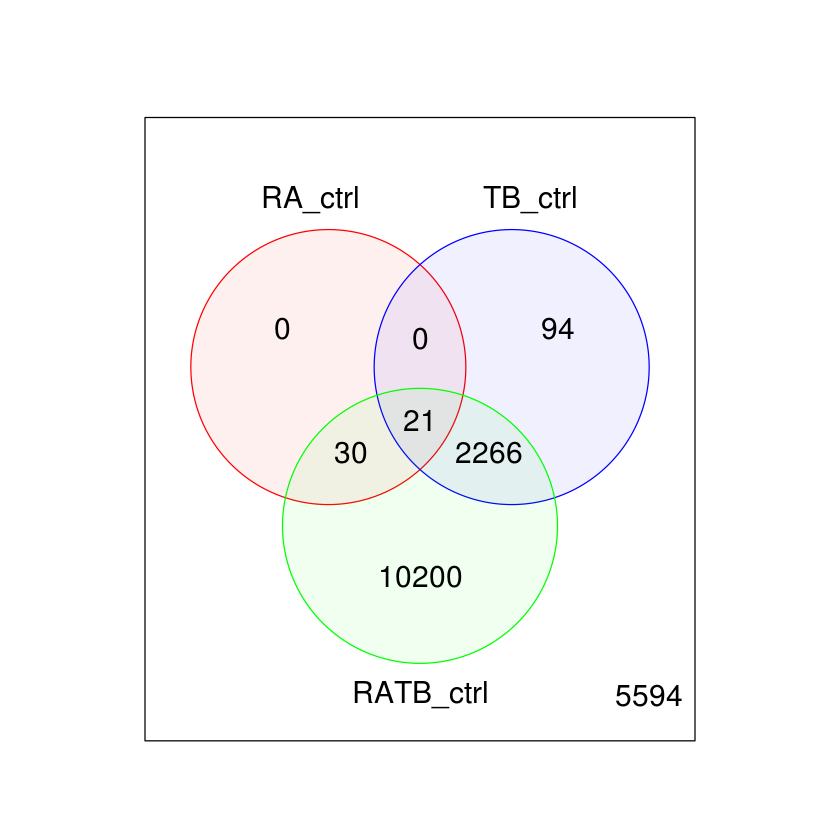

In [40]:
result <-decideTests(efit.contrast,adjust.method = "BH", p.value = 0.01)
summary(result)
vennDiagram(result,include="both",circle.col =c("red","blue","green") )

   RA_ctrl TB_ctrl RATB_ctrl
-1    1500    4121       201
0    15995   10549      3397
1      710    3535     14607

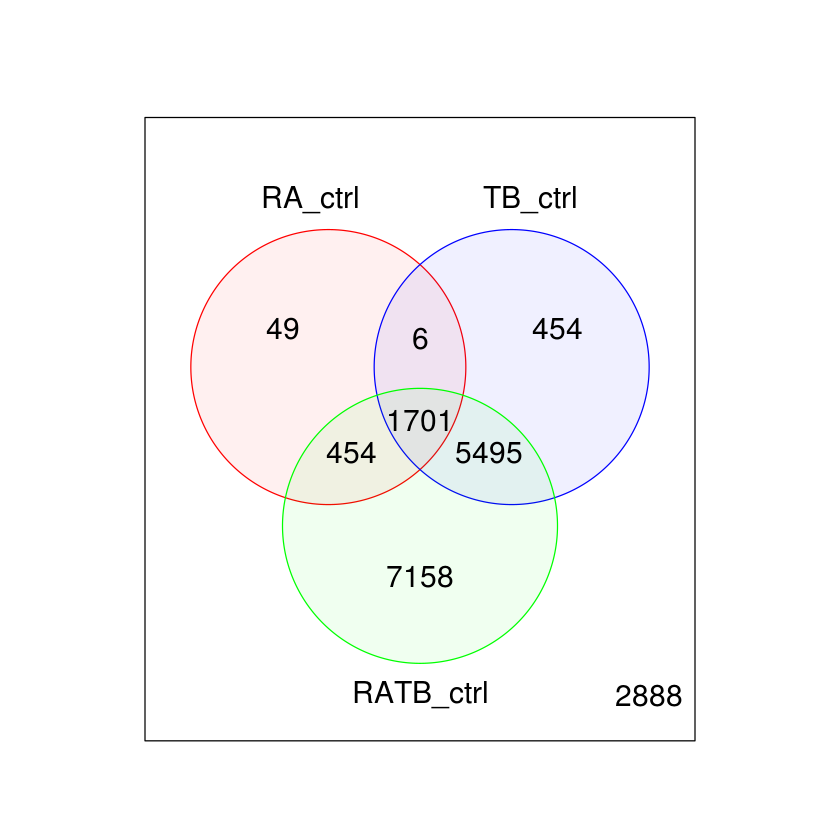

In [41]:
results <- classifyTestsF(efit.contrast, p.value=0.01)
summary(results)
vennDiagram(results,include="both",circle.col =c("red","blue","green") )


In [44]:
top.table <- topTable(efit.contrast, coef=3, sort.by = "P", n = 350)

In [45]:
head(top.table)

,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
UBC,14.07196,14.05420,155.4130,2.853447e-158,5.194700e-154,304.5792
DDX5,11.57342,11.94193,130.4560,9.868430e-148,8.982738e-144,291.7497
RPL11,13.60692,13.68479,123.1972,2.722222e-144,1.651935e-140,287.1067
RPS11,12.99166,13.11904,122.7937,4.285787e-144,1.950569e-140,286.8340
COX4I1,12.27602,12.13657,121.7814,1.346527e-143,4.902704e-140,286.1432
RACK1,13.49002,13.54696,119.6362,1.571805e-142,4.769118e-139,284.6450


In [85]:
getwd()
sig341 <- read.table("/home/ubuntu/NLM_Reproducibility_Workshop/data/sig341Genes_inPaper.txt",header=F)
head(sig341)
dim(sig341)

[1] "/home/ubuntu/NLM_Reproducibility_Workshop/tb_and_arthritis/working"

V1
<fct>
DDX24
PPP1R16B
ALG13
HNRNPH1
USP36
CDKN2AIP


[1] 341   1

In [86]:
summary(as.character(sig341[,1])%in%rownames(top.table))

   Mode   FALSE    TRUE 
logical     331      10 